In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#load data
df = pd.read_excel('NeighborhoodMapping.xlsx')

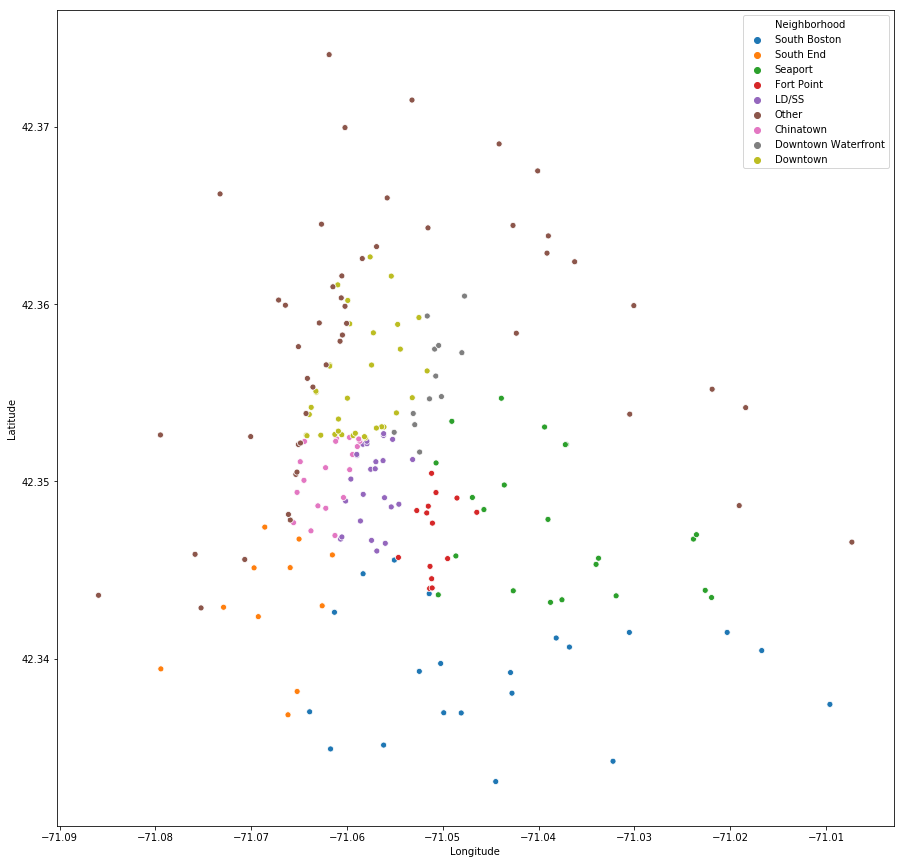

In [2]:
plt.figure(figsize=(15,15))

sns.scatterplot(x='Longitude', y='Latitude',data=df, hue='Neighborhood')

In [3]:
X = df[['Latitude','Longitude']]
y = df['Neighborhood']

In [4]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from keras.utils import np_utils

#create scaler objects
scaler = MinMaxScaler()
#fit the scaler objects
scaler.fit(X)
#transform data
X_scaled = scaler.transform(X)
print('MAX:',scaler.data_max_)
#print(X_scaled)

encoder = LabelEncoder()
encoder.fit(y)
encoded_y = encoder.transform(y)
# convert integers to dummy variables (i.e. one hot encoded)
dummy_y = np_utils.to_categorical(encoded_y)
#dummy_y

Using TensorFlow backend.


MAX: [ 42.374079 -71.007305]


In [15]:
#save scaler
from sklearn.externals import joblib
scaler_filename = "coord_scaler.save"
joblib.dump(scaler, scaler_filename) 

['coord_scaler.save']

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, dummy_y, test_size=0.2, random_state=42)

In [6]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout

model = Sequential()
model.add(Dense(4, activation='relu',input_dim=2))
model.add(Dense(8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(9,activation='softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 4)                 12        
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 40        
_________________________________________________________________
dense_3 (Dense)              (None, 8)                 72        
_________________________________________________________________
dense_4 (Dense)              (None, 16)                144       
_________________________________________________________________
dense_5 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_6 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_7 (Dense)              (None, 32)                1056      
__________

In [7]:
from keras.optimizers import Adam, SGD
optimizer = 'adam'
loss = 'categorical_crossentropy'
metrics=['accuracy']

model.compile(loss=loss,optimizer=optimizer,metrics=metrics)

In [8]:
from keras.callbacks import ModelCheckpoint

checkpoints = ModelCheckpoint('./model.best.hdf5',monitor='val_loss',save_best_only=True,verbose=1)

model.fit(x=X_train, y=y_train, validation_data=(X_test, y_test),epochs=1000, verbose=1, callbacks=[checkpoints])

Train on 165 samples, validate on 42 samples
Epoch 1/1000
165/165 [==============================] - 1s 4ms/step - loss: 2.1985 - acc: 0.1394 - val_loss: 2.1916 - val_acc: 0.0476

Epoch 00001: val_loss improved from inf to 2.19157, saving model to ./model.best.hdf5
Epoch 2/1000
165/165 [==============================] - 0s 82us/step - loss: 2.1870 - acc: 0.2727 - val_loss: 2.1818 - val_acc: 0.3095

Epoch 00002: val_loss improved from 2.19157 to 2.18183, saving model to ./model.best.hdf5
Epoch 3/1000
165/165 [==============================] - 0s 88us/step - loss: 2.1780 - acc: 0.3152 - val_loss: 2.1703 - val_acc: 0.3095

Epoch 00003: val_loss improved from 2.18183 to 2.17025, saving model to ./model.best.hdf5
Epoch 4/1000
165/165 [==============================] - 0s 78us/step - loss: 2.1664 - acc: 0.3152 - val_loss: 2.1573 - val_acc: 0.3095

Epoch 00004: val_loss improved from 2.17025 to 2.15730, saving model to ./model.best.hdf5
Epoch 5/1000
165/165 [==============================] - 

Epoch 39/1000
165/165 [==============================] - 0s 93us/step - loss: 1.3553 - acc: 0.4182 - val_loss: 1.5294 - val_acc: 0.3810

Epoch 00039: val_loss improved from 1.53214 to 1.52944, saving model to ./model.best.hdf5
Epoch 40/1000
165/165 [==============================] - 0s 94us/step - loss: 1.3551 - acc: 0.4182 - val_loss: 1.5420 - val_acc: 0.3810

Epoch 00040: val_loss did not improve from 1.52944
Epoch 41/1000
165/165 [==============================] - 0s 82us/step - loss: 1.3411 - acc: 0.4424 - val_loss: 1.5249 - val_acc: 0.4048

Epoch 00041: val_loss improved from 1.52944 to 1.52494, saving model to ./model.best.hdf5
Epoch 42/1000
165/165 [==============================] - 0s 86us/step - loss: 1.3333 - acc: 0.4182 - val_loss: 1.5554 - val_acc: 0.3333

Epoch 00042: val_loss did not improve from 1.52494
Epoch 43/1000
165/165 [==============================] - 0s 89us/step - loss: 1.3440 - acc: 0.4545 - val_loss: 1.5914 - val_acc: 0.3095

Epoch 00043: val_loss did not imp


Epoch 00081: val_loss did not improve from 1.47603
Epoch 82/1000
165/165 [==============================] - 0s 78us/step - loss: 1.2240 - acc: 0.4667 - val_loss: 1.4989 - val_acc: 0.3810

Epoch 00082: val_loss did not improve from 1.47603
Epoch 83/1000
165/165 [==============================] - 0s 83us/step - loss: 1.2268 - acc: 0.4667 - val_loss: 1.5895 - val_acc: 0.3333

Epoch 00083: val_loss did not improve from 1.47603
Epoch 84/1000
165/165 [==============================] - 0s 87us/step - loss: 1.2338 - acc: 0.4848 - val_loss: 1.5352 - val_acc: 0.3571

Epoch 00084: val_loss did not improve from 1.47603
Epoch 85/1000
165/165 [==============================] - 0s 82us/step - loss: 1.2395 - acc: 0.4424 - val_loss: 1.5240 - val_acc: 0.3810

Epoch 00085: val_loss did not improve from 1.47603
Epoch 86/1000
165/165 [==============================] - 0s 84us/step - loss: 1.2317 - acc: 0.4909 - val_loss: 1.5568 - val_acc: 0.3095

Epoch 00086: val_loss did not improve from 1.47603
Epoch 87


Epoch 00124: val_loss did not improve from 1.47313
Epoch 125/1000
165/165 [==============================] - 0s 78us/step - loss: 1.2009 - acc: 0.5091 - val_loss: 1.5633 - val_acc: 0.2857

Epoch 00125: val_loss did not improve from 1.47313
Epoch 126/1000
165/165 [==============================] - 0s 81us/step - loss: 1.1994 - acc: 0.4788 - val_loss: 1.5612 - val_acc: 0.3333

Epoch 00126: val_loss did not improve from 1.47313
Epoch 127/1000
165/165 [==============================] - 0s 81us/step - loss: 1.1983 - acc: 0.4606 - val_loss: 1.6319 - val_acc: 0.3333

Epoch 00127: val_loss did not improve from 1.47313
Epoch 128/1000
165/165 [==============================] - 0s 82us/step - loss: 1.2148 - acc: 0.4606 - val_loss: 1.6136 - val_acc: 0.3333

Epoch 00128: val_loss did not improve from 1.47313
Epoch 129/1000
165/165 [==============================] - 0s 80us/step - loss: 1.2063 - acc: 0.4667 - val_loss: 1.5910 - val_acc: 0.3333

Epoch 00129: val_loss did not improve from 1.47313
Epo

165/165 [==============================] - 0s 84us/step - loss: 1.1886 - acc: 0.5152 - val_loss: 1.5698 - val_acc: 0.3095

Epoch 00168: val_loss did not improve from 1.46494
Epoch 169/1000
165/165 [==============================] - 0s 82us/step - loss: 1.1897 - acc: 0.4788 - val_loss: 1.5691 - val_acc: 0.3095

Epoch 00169: val_loss did not improve from 1.46494
Epoch 170/1000
165/165 [==============================] - 0s 82us/step - loss: 1.1896 - acc: 0.4667 - val_loss: 1.5860 - val_acc: 0.3095

Epoch 00170: val_loss did not improve from 1.46494
Epoch 171/1000
165/165 [==============================] - 0s 83us/step - loss: 1.1947 - acc: 0.4909 - val_loss: 1.6612 - val_acc: 0.3333

Epoch 00171: val_loss did not improve from 1.46494
Epoch 172/1000
165/165 [==============================] - 0s 88us/step - loss: 1.2012 - acc: 0.4667 - val_loss: 1.5619 - val_acc: 0.3095

Epoch 00172: val_loss did not improve from 1.46494
Epoch 173/1000
165/165 [==============================] - 0s 84us/step

165/165 [==============================] - 0s 84us/step - loss: 1.1809 - acc: 0.4788 - val_loss: 1.5380 - val_acc: 0.3333

Epoch 00211: val_loss did not improve from 1.46494
Epoch 212/1000
165/165 [==============================] - 0s 83us/step - loss: 1.1644 - acc: 0.5030 - val_loss: 1.5570 - val_acc: 0.3571

Epoch 00212: val_loss did not improve from 1.46494
Epoch 213/1000
165/165 [==============================] - 0s 89us/step - loss: 1.1713 - acc: 0.4848 - val_loss: 1.5447 - val_acc: 0.3333

Epoch 00213: val_loss did not improve from 1.46494
Epoch 214/1000
165/165 [==============================] - 0s 84us/step - loss: 1.1653 - acc: 0.4848 - val_loss: 1.5425 - val_acc: 0.3333

Epoch 00214: val_loss did not improve from 1.46494
Epoch 215/1000
165/165 [==============================] - 0s 80us/step - loss: 1.1731 - acc: 0.4848 - val_loss: 1.5348 - val_acc: 0.3333

Epoch 00215: val_loss did not improve from 1.46494
Epoch 216/1000
165/165 [==============================] - 0s 82us/step

165/165 [==============================] - ETA: 0s - loss: 1.2091 - acc: 0.500 - 0s 84us/step - loss: 1.1575 - acc: 0.4848 - val_loss: 1.5621 - val_acc: 0.3571

Epoch 00254: val_loss did not improve from 1.46494
Epoch 255/1000
165/165 [==============================] - 0s 87us/step - loss: 1.1565 - acc: 0.4667 - val_loss: 1.5730 - val_acc: 0.3333

Epoch 00255: val_loss did not improve from 1.46494
Epoch 256/1000
165/165 [==============================] - 0s 91us/step - loss: 1.1834 - acc: 0.4909 - val_loss: 1.5779 - val_acc: 0.3095

Epoch 00256: val_loss did not improve from 1.46494
Epoch 257/1000
165/165 [==============================] - 0s 85us/step - loss: 1.2411 - acc: 0.4727 - val_loss: 1.5504 - val_acc: 0.3333

Epoch 00257: val_loss did not improve from 1.46494
Epoch 258/1000
165/165 [==============================] - 0s 82us/step - loss: 1.1518 - acc: 0.4606 - val_loss: 1.6460 - val_acc: 0.3333

Epoch 00258: val_loss did not improve from 1.46494
Epoch 259/1000
165/165 [========

165/165 [==============================] - 0s 81us/step - loss: 1.1716 - acc: 0.4970 - val_loss: 1.5506 - val_acc: 0.3333

Epoch 00296: val_loss did not improve from 1.46494
Epoch 297/1000
165/165 [==============================] - 0s 88us/step - loss: 1.1643 - acc: 0.5394 - val_loss: 1.6172 - val_acc: 0.3095

Epoch 00297: val_loss did not improve from 1.46494
Epoch 298/1000
165/165 [==============================] - 0s 85us/step - loss: 1.1601 - acc: 0.5152 - val_loss: 1.5535 - val_acc: 0.3333

Epoch 00298: val_loss did not improve from 1.46494
Epoch 299/1000
165/165 [==============================] - 0s 83us/step - loss: 1.1567 - acc: 0.5212 - val_loss: 1.6062 - val_acc: 0.3333

Epoch 00299: val_loss did not improve from 1.46494
Epoch 300/1000
165/165 [==============================] - 0s 90us/step - loss: 1.1536 - acc: 0.4848 - val_loss: 1.6021 - val_acc: 0.3095

Epoch 00300: val_loss did not improve from 1.46494
Epoch 301/1000
165/165 [==============================] - 0s 86us/step

165/165 [==============================] - 0s 83us/step - loss: 1.1588 - acc: 0.5091 - val_loss: 1.6131 - val_acc: 0.3571

Epoch 00339: val_loss did not improve from 1.46462
Epoch 340/1000
165/165 [==============================] - 0s 83us/step - loss: 1.1492 - acc: 0.5152 - val_loss: 1.5846 - val_acc: 0.3333

Epoch 00340: val_loss did not improve from 1.46462
Epoch 341/1000
165/165 [==============================] - 0s 89us/step - loss: 1.1718 - acc: 0.4606 - val_loss: 1.5492 - val_acc: 0.3095

Epoch 00341: val_loss did not improve from 1.46462
Epoch 342/1000
165/165 [==============================] - 0s 87us/step - loss: 1.1863 - acc: 0.5152 - val_loss: 1.5290 - val_acc: 0.4524

Epoch 00342: val_loss did not improve from 1.46462
Epoch 343/1000
165/165 [==============================] - 0s 86us/step - loss: 1.1611 - acc: 0.5212 - val_loss: 1.6418 - val_acc: 0.3333

Epoch 00343: val_loss did not improve from 1.46462
Epoch 344/1000
165/165 [==============================] - 0s 82us/step

165/165 [==============================] - 0s 85us/step - loss: 1.1227 - acc: 0.5333 - val_loss: 1.5861 - val_acc: 0.3095

Epoch 00382: val_loss did not improve from 1.46462
Epoch 383/1000
165/165 [==============================] - 0s 84us/step - loss: 1.1397 - acc: 0.5091 - val_loss: 1.5786 - val_acc: 0.3333

Epoch 00383: val_loss did not improve from 1.46462
Epoch 384/1000
165/165 [==============================] - 0s 85us/step - loss: 1.1332 - acc: 0.5212 - val_loss: 1.5197 - val_acc: 0.2857

Epoch 00384: val_loss did not improve from 1.46462
Epoch 385/1000
165/165 [==============================] - 0s 79us/step - loss: 1.1523 - acc: 0.5212 - val_loss: 1.5371 - val_acc: 0.3333

Epoch 00385: val_loss did not improve from 1.46462
Epoch 386/1000
165/165 [==============================] - ETA: 0s - loss: 0.8693 - acc: 0.625 - 0s 83us/step - loss: 1.1376 - acc: 0.5273 - val_loss: 1.5139 - val_acc: 0.3333

Epoch 00386: val_loss did not improve from 1.46462
Epoch 387/1000
165/165 [========

165/165 [==============================] - 0s 81us/step - loss: 1.1125 - acc: 0.5212 - val_loss: 1.5948 - val_acc: 0.3333

Epoch 00425: val_loss did not improve from 1.46462
Epoch 426/1000
165/165 [==============================] - 0s 84us/step - loss: 1.1133 - acc: 0.5212 - val_loss: 1.6146 - val_acc: 0.3333

Epoch 00426: val_loss did not improve from 1.46462
Epoch 427/1000
165/165 [==============================] - 0s 83us/step - loss: 1.1279 - acc: 0.5273 - val_loss: 1.6123 - val_acc: 0.2857

Epoch 00427: val_loss did not improve from 1.46462
Epoch 428/1000
165/165 [==============================] - 0s 92us/step - loss: 1.1455 - acc: 0.5394 - val_loss: 1.5079 - val_acc: 0.3095

Epoch 00428: val_loss did not improve from 1.46462
Epoch 429/1000
165/165 [==============================] - 0s 82us/step - loss: 1.1195 - acc: 0.5333 - val_loss: 1.5500 - val_acc: 0.3095

Epoch 00429: val_loss did not improve from 1.46462
Epoch 430/1000
165/165 [==============================] - 0s 92us/step

165/165 [==============================] - 0s 87us/step - loss: 1.1152 - acc: 0.5333 - val_loss: 1.5989 - val_acc: 0.2857

Epoch 00468: val_loss did not improve from 1.46462
Epoch 469/1000
165/165 [==============================] - 0s 90us/step - loss: 1.1581 - acc: 0.4848 - val_loss: 1.5447 - val_acc: 0.2857

Epoch 00469: val_loss did not improve from 1.46462
Epoch 470/1000
165/165 [==============================] - 0s 89us/step - loss: 1.1243 - acc: 0.5333 - val_loss: 1.5654 - val_acc: 0.2857

Epoch 00470: val_loss did not improve from 1.46462
Epoch 471/1000
165/165 [==============================] - 0s 83us/step - loss: 1.1159 - acc: 0.5636 - val_loss: 1.5551 - val_acc: 0.3333

Epoch 00471: val_loss did not improve from 1.46462
Epoch 472/1000
165/165 [==============================] - 0s 85us/step - loss: 1.2493 - acc: 0.5273 - val_loss: 1.5710 - val_acc: 0.4286

Epoch 00472: val_loss did not improve from 1.46462
Epoch 473/1000
165/165 [==============================] - 0s 86us/step

165/165 [==============================] - 0s 83us/step - loss: 1.0873 - acc: 0.5394 - val_loss: 1.5637 - val_acc: 0.3333

Epoch 00511: val_loss did not improve from 1.46462
Epoch 512/1000
165/165 [==============================] - 0s 89us/step - loss: 1.0857 - acc: 0.5455 - val_loss: 1.5679 - val_acc: 0.3333

Epoch 00512: val_loss did not improve from 1.46462
Epoch 513/1000
165/165 [==============================] - 0s 88us/step - loss: 1.0893 - acc: 0.5152 - val_loss: 1.5164 - val_acc: 0.3095

Epoch 00513: val_loss did not improve from 1.46462
Epoch 514/1000
165/165 [==============================] - 0s 86us/step - loss: 1.1014 - acc: 0.5394 - val_loss: 1.5193 - val_acc: 0.3095

Epoch 00514: val_loss did not improve from 1.46462
Epoch 515/1000
165/165 [==============================] - 0s 86us/step - loss: 1.0811 - acc: 0.5455 - val_loss: 1.5647 - val_acc: 0.3333

Epoch 00515: val_loss did not improve from 1.46462
Epoch 516/1000
165/165 [==============================] - 0s 87us/step

165/165 [==============================] - 0s 84us/step - loss: 1.0773 - acc: 0.5576 - val_loss: 1.5529 - val_acc: 0.3095

Epoch 00554: val_loss did not improve from 1.46462
Epoch 555/1000
165/165 [==============================] - 0s 85us/step - loss: 1.0701 - acc: 0.5636 - val_loss: 1.5397 - val_acc: 0.3333

Epoch 00555: val_loss did not improve from 1.46462
Epoch 556/1000
165/165 [==============================] - 0s 81us/step - loss: 1.0797 - acc: 0.5273 - val_loss: 1.6035 - val_acc: 0.3571

Epoch 00556: val_loss did not improve from 1.46462
Epoch 557/1000
165/165 [==============================] - 0s 92us/step - loss: 1.1061 - acc: 0.5212 - val_loss: 1.6008 - val_acc: 0.3333

Epoch 00557: val_loss did not improve from 1.46462
Epoch 558/1000
165/165 [==============================] - 0s 82us/step - loss: 1.0860 - acc: 0.5333 - val_loss: 1.6135 - val_acc: 0.2857

Epoch 00558: val_loss did not improve from 1.46462
Epoch 559/1000
165/165 [==============================] - 0s 82us/step

165/165 [==============================] - 0s 88us/step - loss: 1.0703 - acc: 0.5697 - val_loss: 1.6089 - val_acc: 0.3095

Epoch 00597: val_loss did not improve from 1.46462
Epoch 598/1000
165/165 [==============================] - 0s 86us/step - loss: 1.0766 - acc: 0.5394 - val_loss: 1.5852 - val_acc: 0.3095

Epoch 00598: val_loss did not improve from 1.46462
Epoch 599/1000
165/165 [==============================] - 0s 82us/step - loss: 1.0610 - acc: 0.5576 - val_loss: 1.5397 - val_acc: 0.3095

Epoch 00599: val_loss did not improve from 1.46462
Epoch 600/1000
165/165 [==============================] - 0s 84us/step - loss: 1.0786 - acc: 0.5576 - val_loss: 1.5507 - val_acc: 0.2619

Epoch 00600: val_loss did not improve from 1.46462
Epoch 601/1000
165/165 [==============================] - 0s 88us/step - loss: 1.0613 - acc: 0.5636 - val_loss: 1.5482 - val_acc: 0.2857

Epoch 00601: val_loss did not improve from 1.46462
Epoch 602/1000
165/165 [==============================] - 0s 86us/step

165/165 [==============================] - 0s 86us/step - loss: 1.0459 - acc: 0.5758 - val_loss: 1.5481 - val_acc: 0.2857

Epoch 00640: val_loss did not improve from 1.46462
Epoch 641/1000
165/165 [==============================] - 0s 86us/step - loss: 1.0528 - acc: 0.5758 - val_loss: 1.5116 - val_acc: 0.2857

Epoch 00641: val_loss did not improve from 1.46462
Epoch 642/1000
165/165 [==============================] - 0s 84us/step - loss: 1.0380 - acc: 0.6000 - val_loss: 1.5642 - val_acc: 0.3333

Epoch 00642: val_loss did not improve from 1.46462
Epoch 643/1000
165/165 [==============================] - 0s 90us/step - loss: 1.0513 - acc: 0.5758 - val_loss: 1.5312 - val_acc: 0.3333

Epoch 00643: val_loss did not improve from 1.46462
Epoch 644/1000
165/165 [==============================] - 0s 86us/step - loss: 1.0511 - acc: 0.5697 - val_loss: 1.5628 - val_acc: 0.3095

Epoch 00644: val_loss did not improve from 1.46462
Epoch 645/1000
165/165 [==============================] - 0s 86us/step

165/165 [==============================] - 0s 80us/step - loss: 1.0600 - acc: 0.5636 - val_loss: 1.5687 - val_acc: 0.3095

Epoch 00683: val_loss did not improve from 1.46462
Epoch 684/1000
165/165 [==============================] - 0s 71us/step - loss: 1.0392 - acc: 0.5394 - val_loss: 1.5756 - val_acc: 0.3095

Epoch 00684: val_loss did not improve from 1.46462
Epoch 685/1000
165/165 [==============================] - 0s 78us/step - loss: 1.0467 - acc: 0.5515 - val_loss: 1.4943 - val_acc: 0.2857

Epoch 00685: val_loss did not improve from 1.46462
Epoch 686/1000
165/165 [==============================] - 0s 92us/step - loss: 1.0431 - acc: 0.5576 - val_loss: 1.5818 - val_acc: 0.2857

Epoch 00686: val_loss did not improve from 1.46462
Epoch 687/1000
165/165 [==============================] - 0s 85us/step - loss: 1.0515 - acc: 0.5576 - val_loss: 1.5434 - val_acc: 0.3095

Epoch 00687: val_loss did not improve from 1.46462
Epoch 688/1000
165/165 [==============================] - 0s 84us/step

165/165 [==============================] - 0s 83us/step - loss: 1.0083 - acc: 0.5636 - val_loss: 1.5849 - val_acc: 0.2857

Epoch 00726: val_loss did not improve from 1.46462
Epoch 727/1000
165/165 [==============================] - 0s 86us/step - loss: 1.0101 - acc: 0.5576 - val_loss: 1.5447 - val_acc: 0.3095

Epoch 00727: val_loss did not improve from 1.46462
Epoch 728/1000
165/165 [==============================] - 0s 91us/step - loss: 1.0167 - acc: 0.5636 - val_loss: 1.5169 - val_acc: 0.3095

Epoch 00728: val_loss did not improve from 1.46462
Epoch 729/1000
165/165 [==============================] - 0s 85us/step - loss: 1.0083 - acc: 0.5697 - val_loss: 1.6252 - val_acc: 0.2857

Epoch 00729: val_loss did not improve from 1.46462
Epoch 730/1000
165/165 [==============================] - 0s 84us/step - loss: 1.0078 - acc: 0.5758 - val_loss: 1.5375 - val_acc: 0.3333

Epoch 00730: val_loss did not improve from 1.46462
Epoch 731/1000
165/165 [==============================] - 0s 83us/step

165/165 [==============================] - 0s 84us/step - loss: 1.0020 - acc: 0.5758 - val_loss: 1.4633 - val_acc: 0.4762

Epoch 00768: val_loss did not improve from 1.38941
Epoch 769/1000
165/165 [==============================] - 0s 89us/step - loss: 1.0105 - acc: 0.5939 - val_loss: 1.4737 - val_acc: 0.3095

Epoch 00769: val_loss did not improve from 1.38941
Epoch 770/1000
165/165 [==============================] - 0s 85us/step - loss: 0.9809 - acc: 0.5758 - val_loss: 1.4282 - val_acc: 0.3571

Epoch 00770: val_loss did not improve from 1.38941
Epoch 771/1000
165/165 [==============================] - 0s 93us/step - loss: 0.9755 - acc: 0.6061 - val_loss: 1.4902 - val_acc: 0.3095

Epoch 00771: val_loss did not improve from 1.38941
Epoch 772/1000
165/165 [==============================] - 0s 92us/step - loss: 0.9701 - acc: 0.5879 - val_loss: 1.4621 - val_acc: 0.3333

Epoch 00772: val_loss did not improve from 1.38941
Epoch 773/1000
165/165 [==============================] - 0s 87us/step


Epoch 00810: val_loss did not improve from 1.29473
Epoch 811/1000
165/165 [==============================] - 0s 93us/step - loss: 0.9075 - acc: 0.6303 - val_loss: 1.3084 - val_acc: 0.5238

Epoch 00811: val_loss did not improve from 1.29473
Epoch 812/1000
165/165 [==============================] - 0s 88us/step - loss: 0.9447 - acc: 0.6545 - val_loss: 1.2928 - val_acc: 0.5000

Epoch 00812: val_loss improved from 1.29473 to 1.29277, saving model to ./model.best.hdf5
Epoch 813/1000
165/165 [==============================] - 0s 77us/step - loss: 0.9274 - acc: 0.6364 - val_loss: 1.5286 - val_acc: 0.4524

Epoch 00813: val_loss did not improve from 1.29277
Epoch 814/1000
165/165 [==============================] - ETA: 0s - loss: 0.9645 - acc: 0.531 - 0s 87us/step - loss: 0.9311 - acc: 0.6242 - val_loss: 1.3552 - val_acc: 0.5952

Epoch 00814: val_loss did not improve from 1.29277
Epoch 815/1000
165/165 [==============================] - 0s 90us/step - loss: 0.9289 - acc: 0.6667 - val_loss: 1.3

165/165 [==============================] - 0s 87us/step - loss: 0.7633 - acc: 0.7091 - val_loss: 1.3897 - val_acc: 0.5238

Epoch 00853: val_loss did not improve from 1.24362
Epoch 854/1000
165/165 [==============================] - 0s 85us/step - loss: 0.7719 - acc: 0.7212 - val_loss: 1.3350 - val_acc: 0.5476

Epoch 00854: val_loss did not improve from 1.24362
Epoch 855/1000
165/165 [==============================] - 0s 90us/step - loss: 0.7590 - acc: 0.7152 - val_loss: 1.3989 - val_acc: 0.5238

Epoch 00855: val_loss did not improve from 1.24362
Epoch 856/1000
165/165 [==============================] - 0s 80us/step - loss: 0.7623 - acc: 0.7091 - val_loss: 1.3606 - val_acc: 0.5238

Epoch 00856: val_loss did not improve from 1.24362
Epoch 857/1000
165/165 [==============================] - 0s 81us/step - loss: 0.7666 - acc: 0.6848 - val_loss: 1.3285 - val_acc: 0.5476

Epoch 00857: val_loss did not improve from 1.24362
Epoch 858/1000
165/165 [==============================] - 0s 92us/step

165/165 [==============================] - 0s 86us/step - loss: 0.6609 - acc: 0.7455 - val_loss: 1.2439 - val_acc: 0.5714

Epoch 00896: val_loss did not improve from 1.23262
Epoch 897/1000
165/165 [==============================] - 0s 86us/step - loss: 0.6779 - acc: 0.7455 - val_loss: 1.2303 - val_acc: 0.5000

Epoch 00897: val_loss improved from 1.23262 to 1.23029, saving model to ./model.best.hdf5
Epoch 898/1000
165/165 [==============================] - 0s 84us/step - loss: 0.6776 - acc: 0.7455 - val_loss: 1.2902 - val_acc: 0.5952

Epoch 00898: val_loss did not improve from 1.23029
Epoch 899/1000
165/165 [==============================] - 0s 85us/step - loss: 0.6819 - acc: 0.7758 - val_loss: 1.2404 - val_acc: 0.5714

Epoch 00899: val_loss did not improve from 1.23029
Epoch 900/1000
165/165 [==============================] - 0s 83us/step - loss: 0.6545 - acc: 0.7636 - val_loss: 1.3024 - val_acc: 0.5952

Epoch 00900: val_loss did not improve from 1.23029
Epoch 901/1000
165/165 [=======


Epoch 00938: val_loss did not improve from 1.12708
Epoch 939/1000
165/165 [==============================] - 0s 83us/step - loss: 0.5763 - acc: 0.8061 - val_loss: 1.1181 - val_acc: 0.5952

Epoch 00939: val_loss improved from 1.12708 to 1.11808, saving model to ./model.best.hdf5
Epoch 940/1000
165/165 [==============================] - 0s 91us/step - loss: 0.5921 - acc: 0.7697 - val_loss: 1.2322 - val_acc: 0.6667

Epoch 00940: val_loss did not improve from 1.11808
Epoch 941/1000
165/165 [==============================] - 0s 81us/step - loss: 0.5953 - acc: 0.7818 - val_loss: 1.2265 - val_acc: 0.5714

Epoch 00941: val_loss did not improve from 1.11808
Epoch 942/1000
165/165 [==============================] - 0s 82us/step - loss: 0.5643 - acc: 0.7758 - val_loss: 1.2654 - val_acc: 0.5952

Epoch 00942: val_loss did not improve from 1.11808
Epoch 943/1000
165/165 [==============================] - 0s 85us/step - loss: 0.5936 - acc: 0.7576 - val_loss: 1.1821 - val_acc: 0.5476

Epoch 00943: va

165/165 [==============================] - 0s 84us/step - loss: 0.4756 - acc: 0.8061 - val_loss: 1.0299 - val_acc: 0.6190

Epoch 00980: val_loss did not improve from 0.99055
Epoch 981/1000
165/165 [==============================] - 0s 87us/step - loss: 0.4831 - acc: 0.7939 - val_loss: 1.0338 - val_acc: 0.6190

Epoch 00981: val_loss did not improve from 0.99055
Epoch 982/1000
165/165 [==============================] - 0s 91us/step - loss: 0.4733 - acc: 0.8303 - val_loss: 1.0171 - val_acc: 0.6190

Epoch 00982: val_loss did not improve from 0.99055
Epoch 983/1000
165/165 [==============================] - 0s 87us/step - loss: 0.4831 - acc: 0.8000 - val_loss: 0.9835 - val_acc: 0.6429

Epoch 00983: val_loss improved from 0.99055 to 0.98352, saving model to ./model.best.hdf5
Epoch 984/1000
165/165 [==============================] - 0s 88us/step - loss: 0.5008 - acc: 0.7758 - val_loss: 1.0535 - val_acc: 0.6190

Epoch 00984: val_loss did not improve from 0.98352
Epoch 985/1000
165/165 [=======

In [9]:
# evaluate the model
scores = model.evaluate(X_scaled, dummy_y, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

acc: 75.85%


In [10]:
from keras.models import model_from_json
model_json = model.to_json()

with open("model.json", "w") as json_file:
    json_file.write(model_json)

In [11]:
# load json and create model
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("./model.best.hdf5")

loaded_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [12]:
prediction_map = {0:'Chinatown',
                  1:'Downtown',
                  2:'Downtown Waterfront',
                  3:'Fort Point',
                  4:'LD/SS',
                  5:'Other',
                  6:'Seaport',
                  7:'South Boston',
                  8:'South End'}

In [13]:
X_new = np.array([42.352063, -71.061292])
print(X_new)
X_new = scaler.transform(X_new.reshape(1,-1))
print(X_new)
preds = loaded_model.predict(X_new)[0]
pred_list = list(preds)
pred_list = [ '%.4f' % elem for elem in pred_list ]

[ 42.352063 -71.061292]
[[ 0.46312915  0.31344821]]


In [14]:
prediction_map[pred_list.index(max(pred_list))]

'Chinatown'

In [438]:
###
###Assign neighborhood locations to Google Data
###

#load data
data = pd.read_excel('../SouthStationStudy/0_Code/data_archives/df_processed.xlsx')
#transform coords
locations = data[['lat','long']].values
locations = scaler.transform(locations)
#make neighborhood predictions
neighborhood = loaded_model.predict(locations)
#assign neighborhood based on softmax probability
n_predictions = []
for item in neighborhood:
    a = list(item)
    i = a.index(max(a))
    n_predictions.append(i)

#neighborhood = [list(neighborhood) for i in neighborhood]
#neighborhood = [prediction_map[item.index(max(item))] for item in neighborhood]
n_predictions = [prediction_map[i] for i in n_predictions]
data['neighborhood'] = n_predictions
data.head()

,index,name,lat,long,google_id,venue_type,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday,WeekTotals,mapped_venue_type,activity_cluster,neighborhood
0,0,"McMahon & Associates, PC",42.352366,-71.056066,ChIJddqFA4Jw44kRHz6p3qWTs4c,"['accounting', 'lawyer', 'finance', 'point_of_...",443,531,506,519,514,144,40,2697,finance,2,LD/SS
1,1,"Barclay Damon, LLP",42.352321,-71.056248,ChIJD75e1YBw44kRvDZoMEj44jY,"['accounting', 'lawyer', 'finance', 'point_of_...",443,531,506,519,514,144,40,2697,finance,2,LD/SS
2,2,Request Health Corporation,42.351584,-71.056269,ChIJv1J9rnh644kR4hc29XVaEFg,"['accounting', 'finance', 'point_of_interest',...",443,531,506,519,514,144,40,2697,finance,2,LD/SS
3,3,StackUp,42.351586,-71.056323,ChIJY_v-pXh744kRub1hj4RNwkk,"['accounting', 'finance', 'point_of_interest',...",443,531,506,519,514,144,40,2697,finance,2,LD/SS
4,4,KPMG,42.351781,-71.056737,ChIJDaRRe4Jw44kRjXWBXIsFgj0,"['accounting', 'finance', 'point_of_interest',...",443,531,506,519,514,144,40,2697,finance,2,LD/SS


In [440]:
len(data[data['neighborhood']=='LD/SS'])

330